# GDD 分布



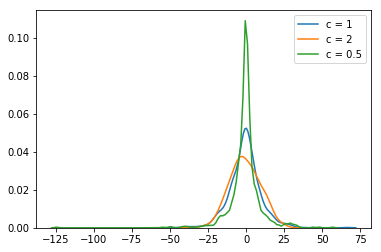

In [43]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


path0 = "build/gdd0_beta0.141421_c1.txt"
path1 = "build/gdd0_beta0.0707107_c2.txt"
path2 = "build/gdd0_beta1.09545_c0.5.txt"
path = [path0, path1, path2]
lines = []
x = []

for i in range(3):
    with open(path[i]) as file_obj:
        lines.append(file_obj.readlines())
        x_tmp = []
        for line in lines[i]:
            x_tmp.append(float(line.rstrip()))
        x.append(x_tmp)

# print(x)
fig = plt.figure(num = 3)
sns.kdeplot(x[0], label = 'c = 1')
sns.kdeplot(x[1], label = 'c = 2')
sns.kdeplot(x[2], label = 'c = 0.5')

# sns.distplot(x[0], hist = False, kde = True, color = 'b', label = 'c = 1')
# sns.distplot(x[1], hist = False, kde = True, color = 'r', lable = 'c = 2')
# sns.distplot(x[2], hist = False, kde = True, color = 'g', lable = 'c = 0.5')
plt.legend()

# 绘制性能曲线
从程序生成的性能文件中可以读取，三个形状参数下，对于不同阈值的性能表现，即 $p_fa$ 和 $p_m$
文件格式为：
1. 文件名：`performance_<distribution_name>_a<a_value>_c<c_value>.txt`
2. 每个文件有 g 行，g 是阈值的个数。文件格式形如：
   ```shell
   pfa_1 pm_1
   pfa_2 pm_2
   ...
   pfa_g pm_g
   ```


由于电脑性能有限，无法达到 `1E-6` 的精度，因此某几组数据的第一个数据点横坐标和某几组数据的最后一个数据纵坐标是伪造的很小的数，绘制的性能曲线如下：
没受到攻击时：
![ggd](images/ggd-roc.png)
受到攻击时：
![gauss](images/gauss-roc.png)


[3e-05, 6e-05, 0.00019, 0.00126, 0.01055, 0.09924]
[0.50527, 0.31913, 0.15597, 0.04916, 0.00795, 0.00023]
[[0.5039924753168323, 0.3161380447477394, 0.15282318985409282, 0.049146692155640846, 0.007823033702801704, 0.00026822315789857225], [0.17394869329175855, 0.0767598313559061, 0.024243036140115585, 0.004635883568075047, 0.0003816766448584408, 5.155461999144227e-06]]
-------------
[1e-06, 1e-05, 0.00014, 0.00096, 0.00963, 0.09817]
[0.50643, 0.31656, 0.15235, 0.0498, 0.00851, 0.0003]
[[0.5039924753168323, 0.3161380447477394, 0.15282318985409282, 0.049146692155640846, 0.007823033702801704, 0.00026822315789857225], [0.17394869329175855, 0.0767598313559061, 0.024243036140115585, 0.004635883568075047, 0.0003816766448584408, 5.155461999144227e-06]]
-------------
[1e-06, 6e-05, 0.00012, 0.00089, 0.01073, 0.10088]
[0.50182, 0.3151, 0.15069, 0.04909, 0.0082, 0.00025]
[[0.5039924753168323, 0.3161380447477394, 0.15282318985409282, 0.049146692155640846, 0.007823033702801704, 0.0002682231578985722

FileNotFoundError: [Errno 2] No such file or directory: 'data/performance_Gauss_a1.8_c0.5.txt'

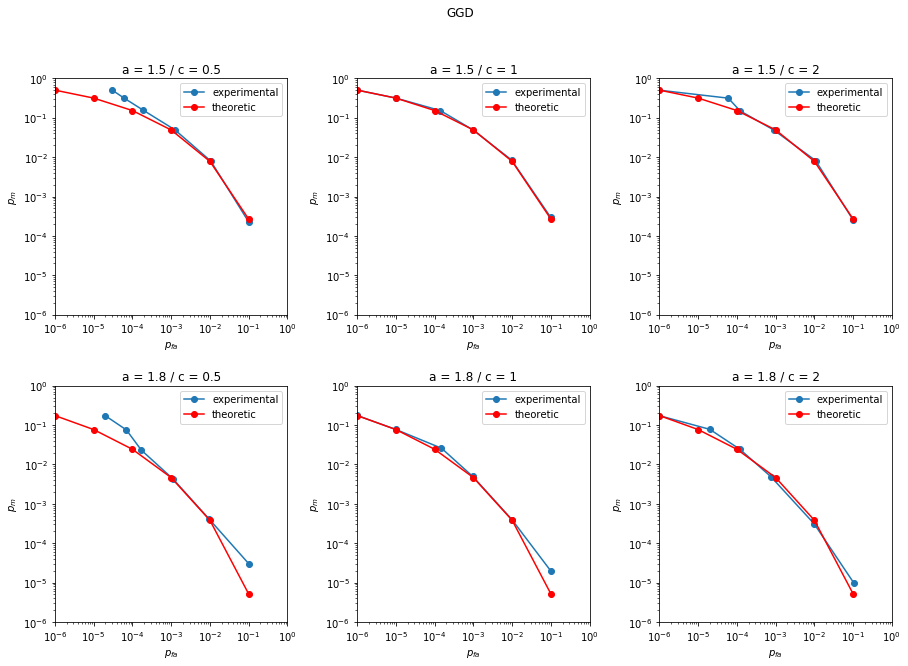

<Figure size 1080x360 with 0 Axes>

In [79]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
from scipy.special import erfcinv
from scipy.stats import norm

def modify(l, offset):
    res = []
    count = len(l)
    if offset == 1:
        count = 0
    for a in l:
        if a == 0:
            modify_val = math.pow(10, -count)
            res.append(a + modify_val)
        else: 
            res.append(a)
        count = count + offset
    return res

def draw(a, c, distri, STD):
    pfa_theory = [1E-06, 1E-05, 1E-4, 1E-3, 0.01, 0.1]
    psi_theory = []
    for i in range(len(pfa_theory)):
        psi_theory.append(math.sqrt(2) * 10 * erfcinv(2 * pfa_theory[i]) / math.sqrt(1000))
    pm_theory = []
    for i in range(len(a)):
        l = []
        for j in range(len(pfa_theory)):
            elem = norm.cdf(math.sqrt(1000) * (psi_theory[j] - a[i]) / STD)
            l.append(elem)
        pm_theory.append(l)
    # pm_theory = [[0.173949, 0.0767598, 0.024243, 0.00463588, 0.000381677, 5.15546E-06],
    #                  [0.503992, 0.316138, 0.152823, 0.0491467, 0.00782303, 0.000268223]]
    fig = plt.figure(num = len(a) * len(c), figsize = (len(c) * 5, len(a) * 5))
    fig.suptitle(distri)
    # fig.tight_layout(h_pad = 5)
    # plt.suptitle(distri)
    for i in range(len(a)):
        path0 = prefix + distri + "_a" + str(a[i]) +"_"
        ax_title0 = "a = " + str(a[i]) + " / "
        for j in range(len(c)):
            pfa = []
            pm = []
            path = path0 + "c" + str(c[j]) + suffix
            ax_title = ax_title0 + "c = " + str(c[j])
            with open(path) as file_obj:
                lines = file_obj.readlines()
                for line in lines:
                    word = line.split(" ")
                    pfa.append(float(word[0]))
                    pm.append(float(word[1]))
            fig.subplots_adjust(wspace = 0.3, hspace = 0.3)
            ax = plt.subplot(len(a), len(c), i * len(c) + j + 1)
            ax.set_xlabel("$p_{fa}$")
            ax.set_ylabel("$p_m$")
            ax.set_xticklabels(["1E-6", "1E-5", "1E-4", "1E-3", "1E-2", "1E-1"])
            ax.set_yticklabels(["1E-6", "1E-5", "1E-4", "1E-3", "1E-2", "1E-1"])
            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlim(1e-6, 1)
            ax.set_ylim(1e-6, 1)
            ax.set_title(ax_title)
            pfa = modify(pfa, -1)
            pm = modify(pm, 1)
            print(pfa)
            print(pm)
            print(pm_theory)
            # x = np.array(pfa)
            # y = np.array(pm)
            # smooth = interp1d(x, y)
            # xs = np.linspace(1E-6, 1, 300)
            # ys = smooth(xs)
            ax.plot(pfa, pm, marker = 'o', label = "experimental")
            # xt = xs
            # yt = 
            ax.plot(pfa_theory, pm_theory[i], marker = 'o', color = 'r', label = "theoretic")
            ax.legend()
            print("-------------")

                
                
# data 里面的是从 build 里面复制过来的计算好的
# build 里可以持续尝试提高精度

prefix = "data/performance_"
suffix = ".txt"

a_gdd = [1.5, 1.8]
a_gauss = [1.8]
c = [0.5, 1, 2]

# pfa_0 = [1E-06, 1E-05, 1E-4, 1E-3, 0.01, 0.1]
# psi_0 = []
# for i in range(len(pfa_0)):
#     psi_0.append(math.sqrt(2) * 10 * erfcinv(2 * pfa_0[i]) / math.sqrt(1000))
# pm_0 = []
# for i in range()
# pm_0 = norm.cdf((math.sqrt(1000) * psi_0 - a) / 10)

draw(a_gdd, c, "GGD", 10)
draw(a_gauss, c, "Gauss", math.sqrt(2) * 10)

